<a href="https://colab.research.google.com/github/alissaleigh/P2/blob/main/P2_Exploration_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data pulled from [here](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?resource=download)

#Uploading/Importing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
from sklearn import set_config
import seaborn as sns
import pandas as pd
import numpy as np
set_config(display='diagram')

In [3]:
filename = '/content/drive/MyDrive/panda/adult.csv'
df = pd.read_csv(filename)

#Cleaning

###Overview Prior to Cleaning

Can't see where we end up if we don't know where we started

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [6]:
df.duplicated().sum()

52

In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


###Removing Unnessary Data

####Removing Columns

I'm removing education as we have educational-num which breaks down education into a numarical list that will make creating models easier later.


I'm also removing fnlwgt (total weight/income) as the focus of the model will be about whether someone makes more or less then 50K in order to keep things simple. I don't need the total amount each person made as it doesn't benfit the model.

Looking back over the data I am also going to remove the capital gain/loss columns. Both are less a 1000 rows that aren't just 0, with is almost nothing in this particualr data set.

In [8]:
df = df.drop(columns=['education', 'fnlwgt', 'capital-gain', 'capital-loss'])
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K


####Removing Catagories and Other Unnecessary Data

At recomendation, converting ? to unfilled to remove that unneeded data. Looking through the data there are three columns that use ? as a placeholder for missing as you'll see bellow.

[Using this link to get formulas](https://datascienceparichay.com/article/pandas-emove-categories-from-a-categorical-column/)

In [9]:
df["workclass"] = df["workclass"].astype("category")
df["workclass"] = df["workclass"].cat.remove_categories('?')
df["workclass"] = df["workclass"].cat.remove_categories('Without-pay')
df["workclass"] = df["workclass"].cat.remove_categories('Never-worked')
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,NaN,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [10]:
df["occupation"] = df["occupation"].astype("category")
df["occupation"] = df["occupation"].cat.remove_categories("?")
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K


In [11]:
df["native-country"] = df["native-country"].astype("category")
df["native-country"] = df["native-country"].cat.remove_categories("?")
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K


In [12]:
#this was terrifying to look at, but then I scrolled back up to the info cell and remembered how much data total is in this set
df.isna().sum()

age                   0
workclass          2830
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isna().sum()

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

###Removing Duplicates

In [14]:
df.duplicated().sum()

7327

In [15]:
df = df.drop_duplicates()
df.duplicated().sum()

0

###Fixing Inconsistencies and Missing Data

So I did review all the valute counts and there aren't any inconsistencies within the data

In [16]:
df.nunique()

age                74
workclass           6
educational-num    16
marital-status      7
occupation         14
relationship        6
race                5
gender              2
hours-per-week     96
native-country     41
income              2
dtype: int64

In [17]:
df.isna().sum()

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

###Cleaning Up Catagoties


I'm going one final clean up in the workclass column and that's condensing the gov work to just goverment

In [18]:
df['workclass'].value_counts()

Private             26560
Self-emp-not-inc     3612
Local-gov            2908
State-gov            1879
Self-emp-inc         1559
Federal-gov          1356
Name: workclass, dtype: int64

In [19]:
# Standardize the values in the Sex column
df['workclass'] = df['workclass'].replace('Local-gov', 'Goverment')
df['workclass'] = df['workclass'].replace('State-gov', 'Goverment')
df['workclass'] = df['workclass'].replace('Federal-gov', 'Goverment')
df['workclass'].value_counts()

Private             26560
Goverment            6143
Self-emp-not-inc     3612
Self-emp-inc         1559
Name: workclass, dtype: int64

##Visuals

<Axes: >

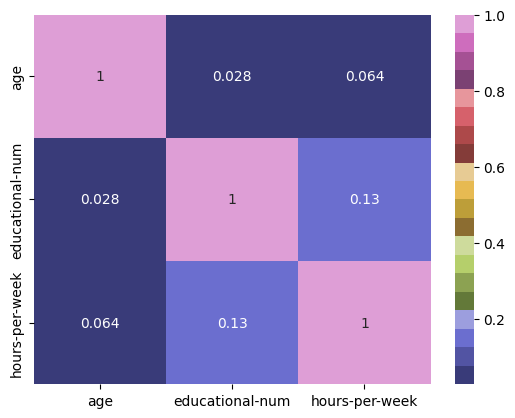

In [20]:
corr = df.corr()
sns.heatmap(corr, cmap = 'tab20b', annot = True)

Looking at the heat map, it looks mostly on the lower end, but I do think it's intresting to see the higer scores are with education level and hours worked.

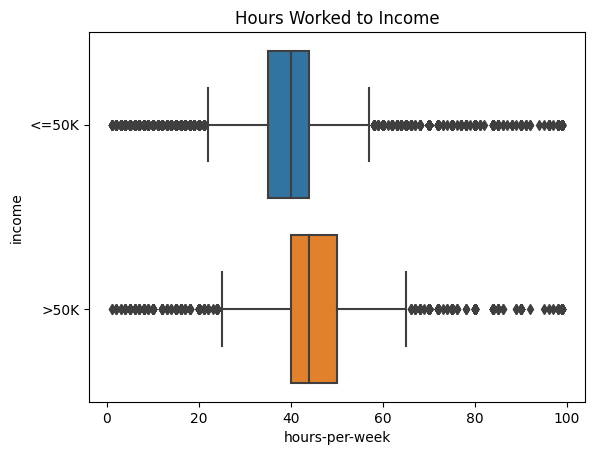

In [21]:
ax = sns.boxplot(y='income', x='hours-per-week', data=df)
ax.set_title("Hours Worked to Income");

Looking at the above boxplot, I don't think it's too shocking that people who are making more, work more. There is a level of expecation in may jobs that when working a higher paying postion, espically a salary postion, that you will work more.

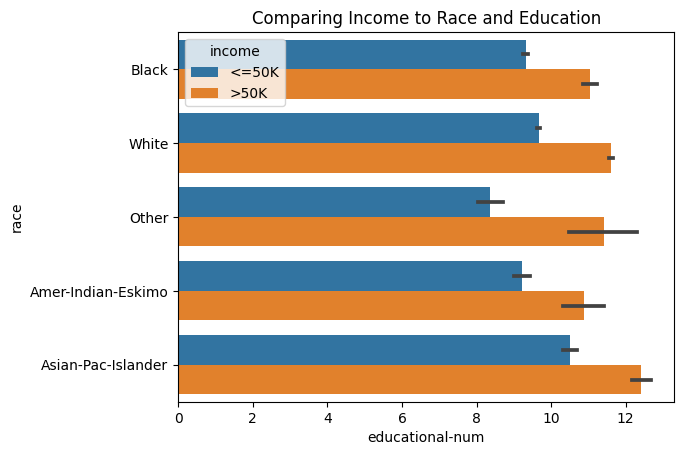

In [22]:
ax = sns.barplot(data=df, y='race', x='educational-num', hue='income');
ax.set_title("Comparing Income to Race and Education");

When looking ath the above barplot I don't find it too shocking to see that those with highter education, regardless of race, have higher paying posisitions.

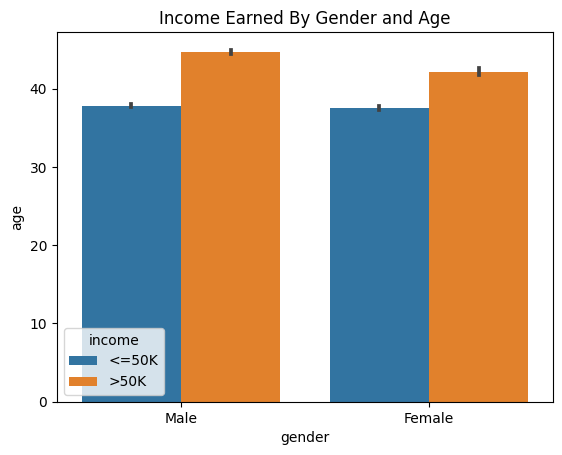

In [23]:
ax = sns.barplot(data=df, y='age', x='gender', hue='income');
ax.set_title("Income Earned By Gender and Age");

I think the most suprsing thing of the above barplot is who close the income below or equal to 50k is acorss both genders. I looks to be about the same, if not the same.

#Futher Exploration

In [24]:
# Create filter for females and save as df_female
female_filter = df['gender'] == "Female"
df_female = df.loc[female_filter]
df_female.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
8,24,Private,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K
12,26,Private,9,Never-married,Adm-clerical,Not-in-family,White,Female,39,United-States,<=50K
17,43,Private,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,30,United-States,<=50K
18,37,Private,9,Widowed,Machine-op-inspct,Unmarried,White,Female,20,United-States,<=50K
21,34,Private,10,Never-married,Other-service,Own-child,Black,Female,35,United-States,<=50K


In [25]:
# Save the opposite rows as df_male using ~female_filter
df_male = df.loc[~female_filter]
df_male.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Goverment,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


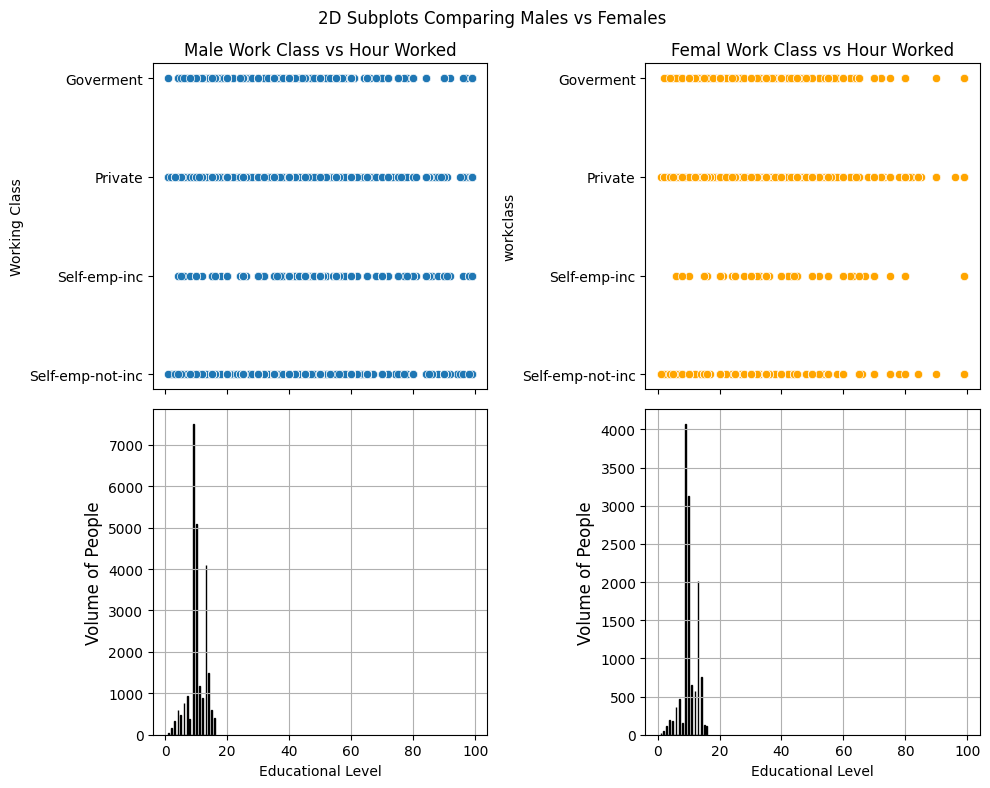

In [26]:
## Creating subplots with 2 rows and 2 columns, sharing the x-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8),
                         sharex=True)
## Plotting male data
# Subplot 0,0 (top-left)
sns.scatterplot(data=df_male, x='hours-per-week', y='workclass', ax=axes[0,0])
axes[0,0].set_title('Male Work Class vs Hour Worked', fontsize = 12);
axes[0,0].set_ylabel("Working Class")
axes[0,0].set_xlabel("Hours Wored per Week")
# Subplot 1,0 (bottom-left)
df_male['educational-num'].hist(bins='auto', edgecolor='black',ax=axes[1,0])
axes[1,0].set_ylabel('Volume of People', fontsize = 12);
axes[1,0].set_xlabel("Educational Level")
## Plotting female data
# Subplot 0,1 (top-right)
sns.scatterplot(data=df_female, x='hours-per-week', y='workclass', ax=axes[0,1],
                color='orange')
axes[0,1].set_title('Femal Work Class vs Hour Worked', fontsize = 12)
axes[0,0].set_ylabel("Working Class")
# Subplot 1,1 (bottom-right)
df_female['educational-num'].hist(bins='auto', edgecolor='black',ax=axes[1,1],
                         color='orange')
axes[1,1].set_ylabel('Volume of People', fontsize = 12);
axes[1,1].set_xlabel("Educational Level")
## Figure title and fixing overlap
fig.suptitle("2D Subplots Comparing Males vs Females ");
fig.tight_layout();

Looking at the above visuals you can see that Men tend to have a higher education and persons working a goverment job work the most amount of hours generally speaks